In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

Clean du lieu

In [ ]:
# Link share google drive của dữ liệu
link='https://drive.google.com/file/d/1D3ns9kqrpDj1YYnVb2Xs_-Vy8ol-ePKu/view?usp=sharing'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]

data = pd.read_csv(path)

# Hiển thị thông tin tổng quan về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [ ]:
# Knowing Number of Rows And Columns
data.shape
print(f"The Number Of Rows : {data.shape[0]}")
print(f"The Number Of Columns is : {data.shape[1]}")

The Number Of Rows : 1000
The Number Of Columns is : 25


In [ ]:

data = data.drop('Patient Id',axis=1)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [ ]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Data visulization

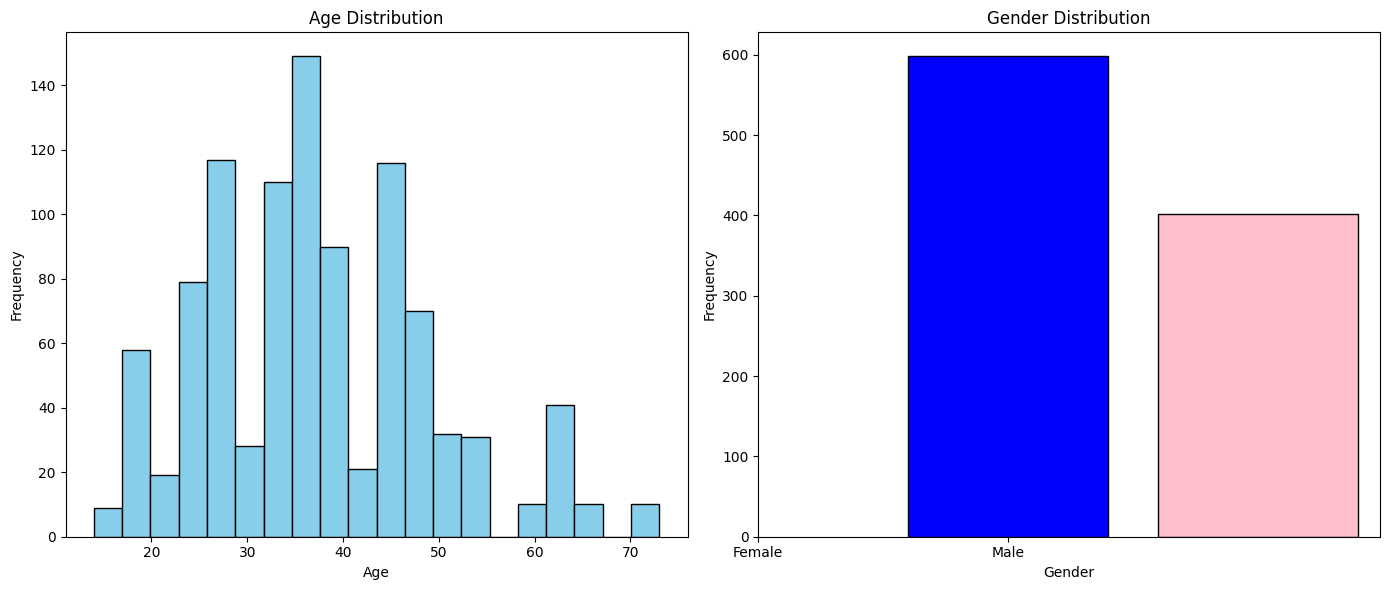

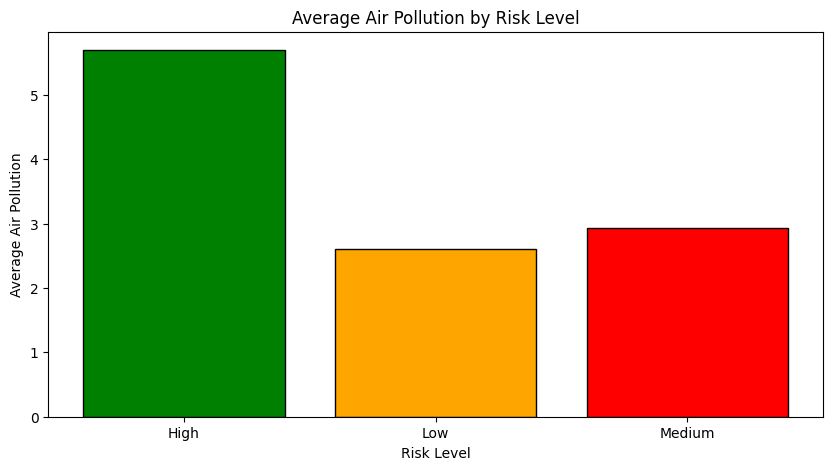

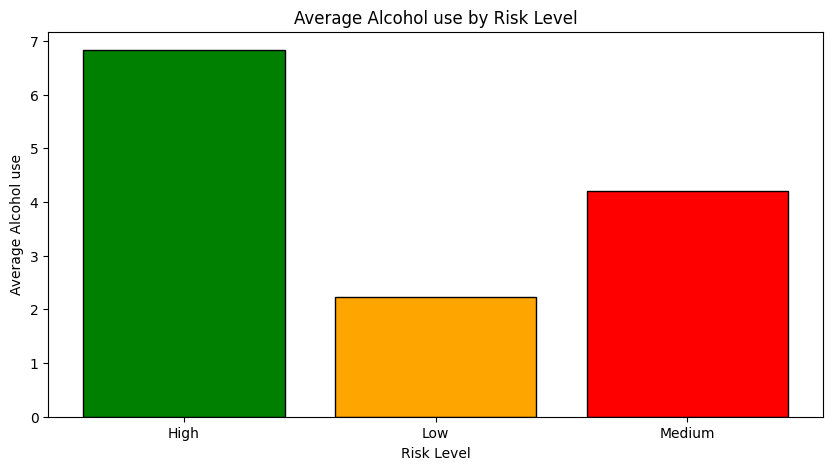

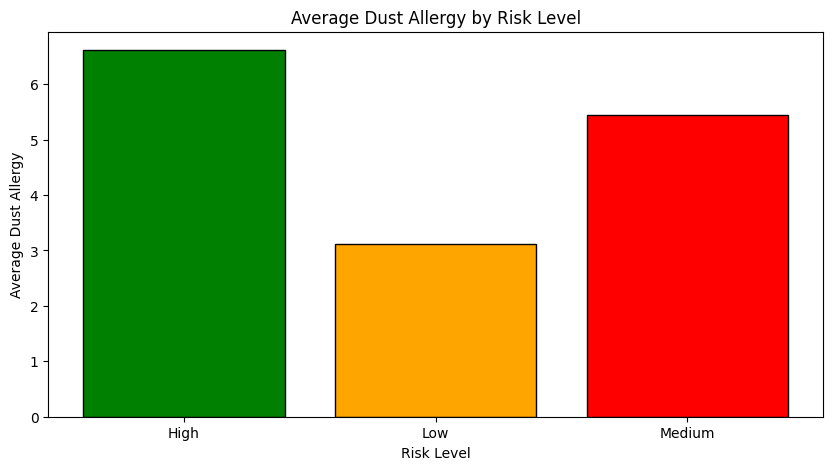

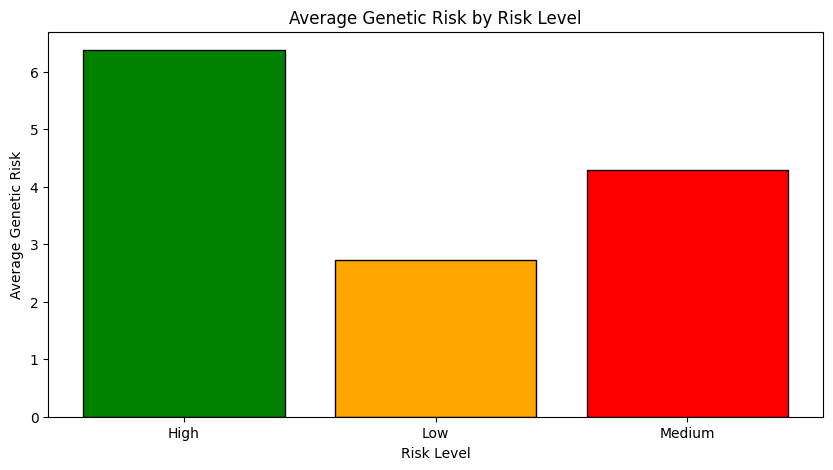

In [ ]:


# Visualizing the distribution of Age and Gender
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts(), color=['blue', 'pink'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

# Visualizing the relationship between some selected features and risk level
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk']
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    plt.bar(data.groupby('Level')[feature].mean().index, data.groupby('Level')[feature].mean(), color=['green', 'orange', 'red'], edgecolor='black')
    plt.title(f'Average {feature} by Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(f'Average {feature}')
    plt.show()


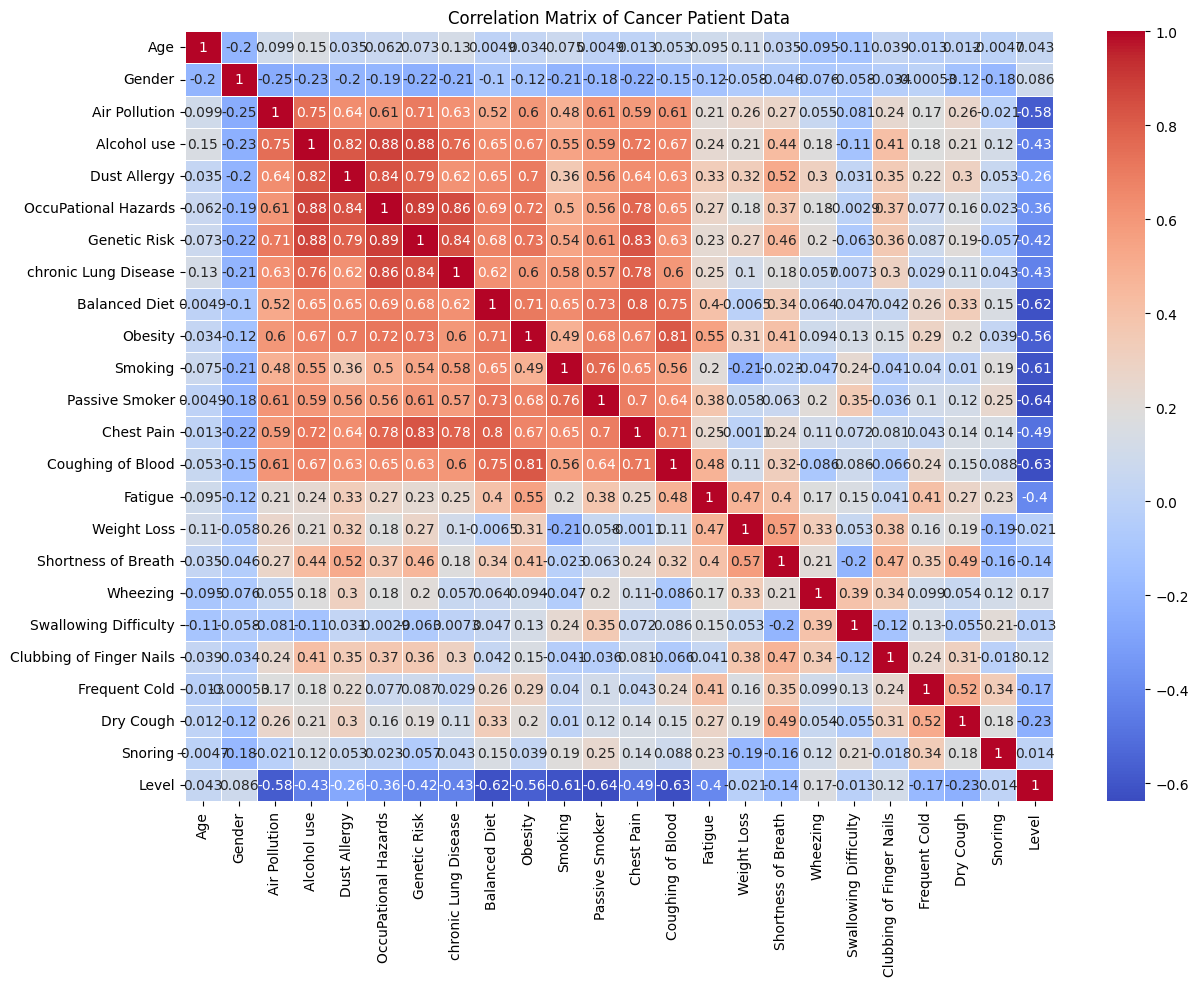

In [ ]:
# Visualize correlations
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cancer Patient Data')
plt.show()


Strong Positive Correlations:

There is a notable positive correlation between Genetic Risk and chronic Lung Disease.
Obesity and Smoking show a positive correlation.
Passive Smoker and Smoking also have a positive correlation.


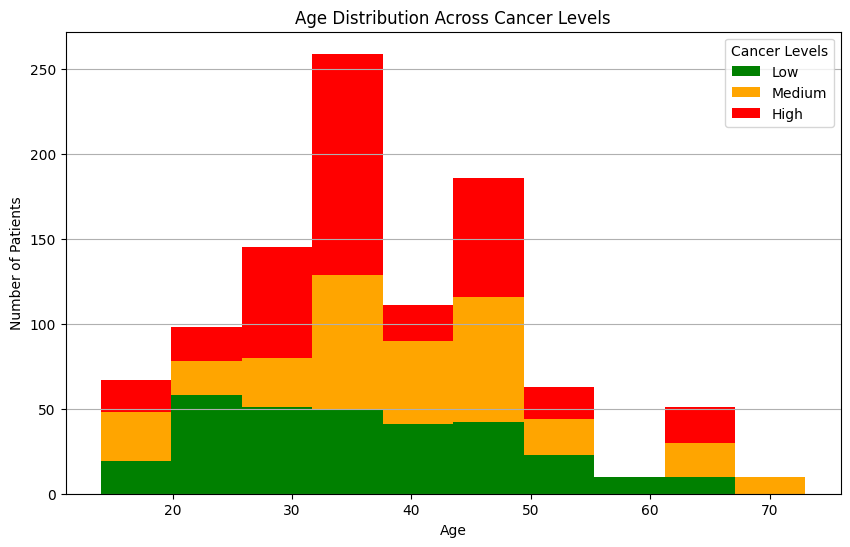

In [ ]:

# Define distinct colors for each level again
colors = {
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red'
}

# Plotting
plt.figure(figsize=(10, 6))

# Create stacked histogram
plt.hist(
    [data[data['Level'] == level]['Age'] for level in data['Level'].unique()],
    bins=10,
    stacked=True,
    color=[colors.get(level, 'grey') for level in data['Level'].unique()],
    label=data['Level'].unique()
)

plt.title('Age Distribution Across Cancer Levels')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Levels')
plt.grid(axis='y')
plt.show()


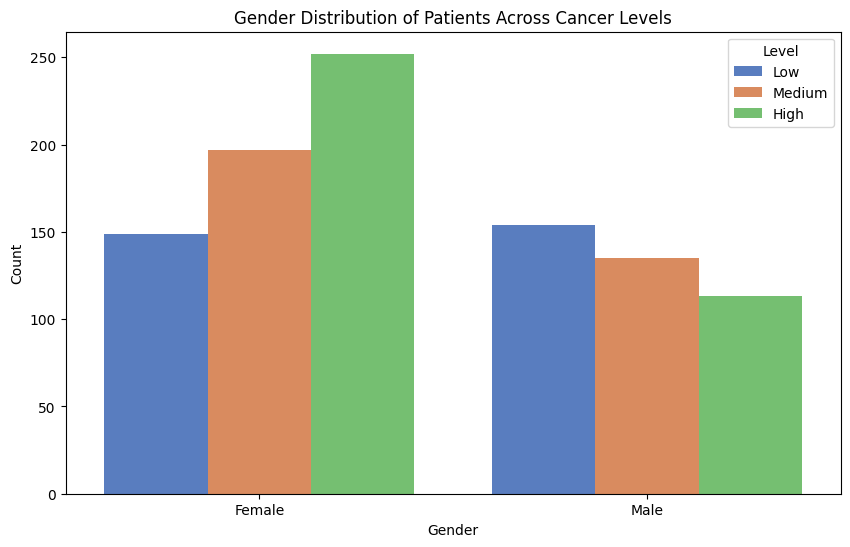

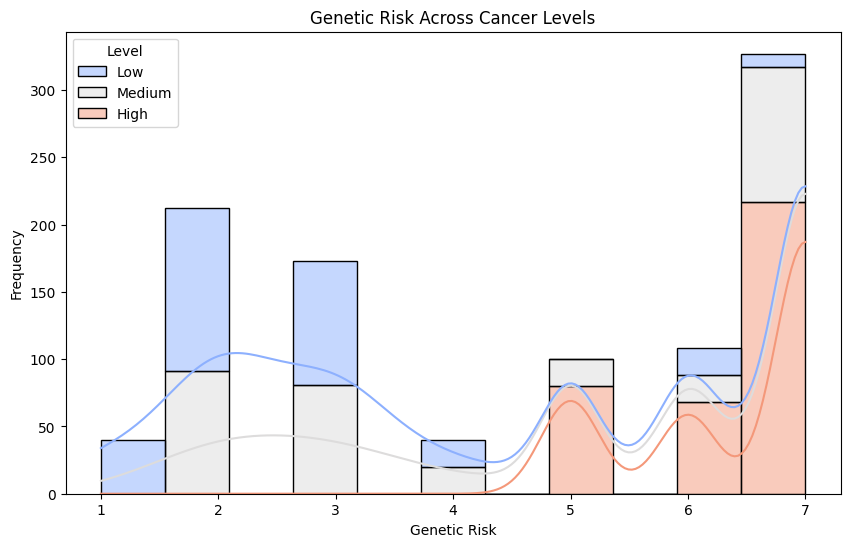

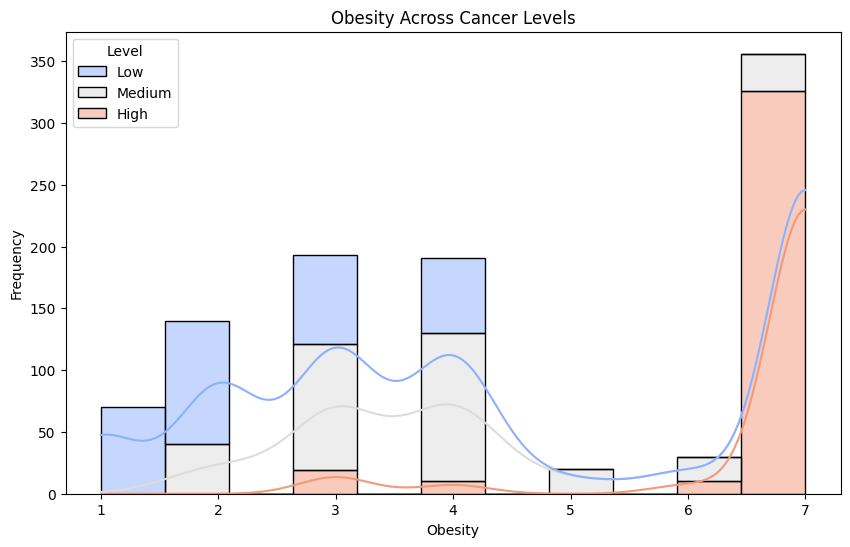

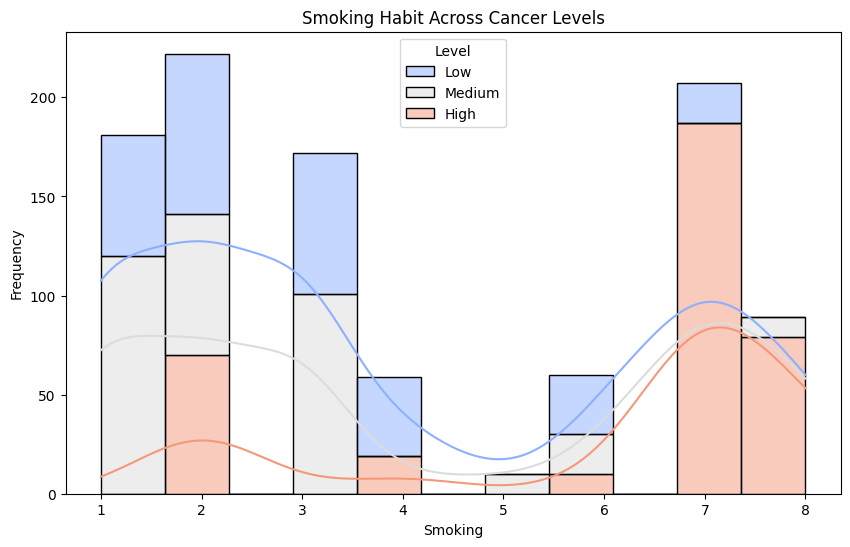

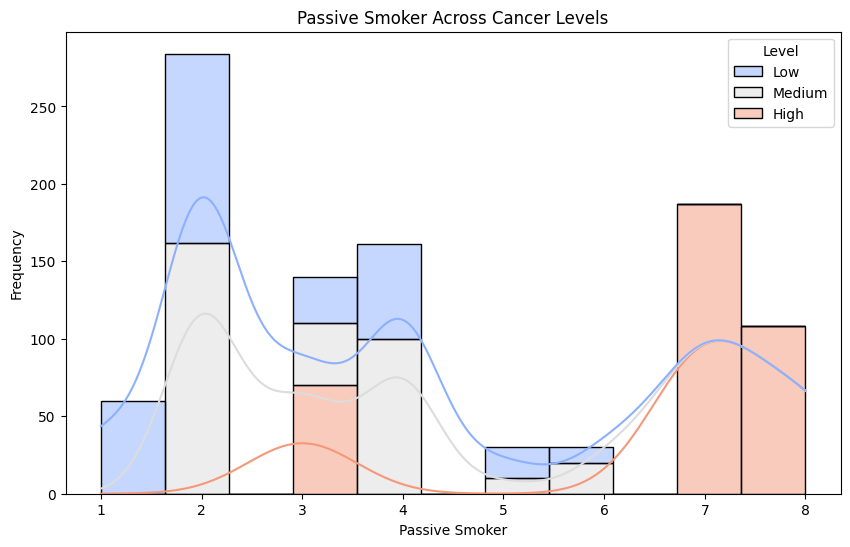

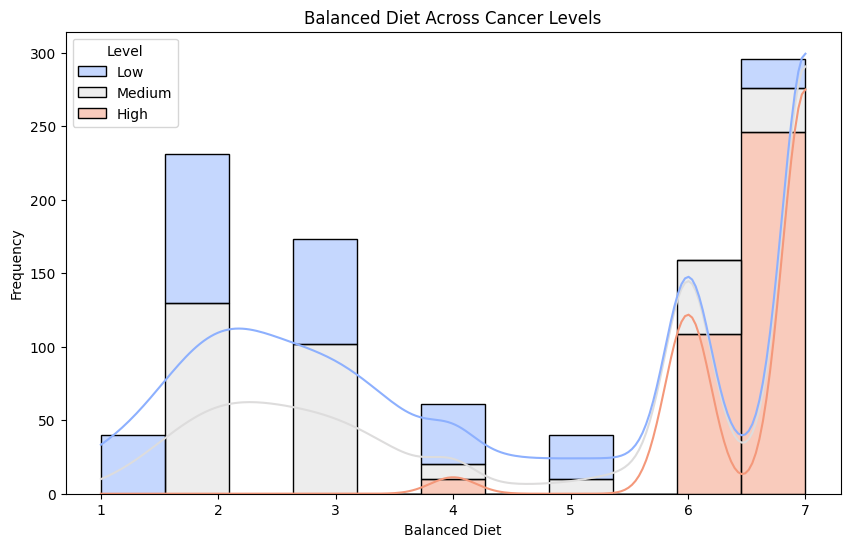

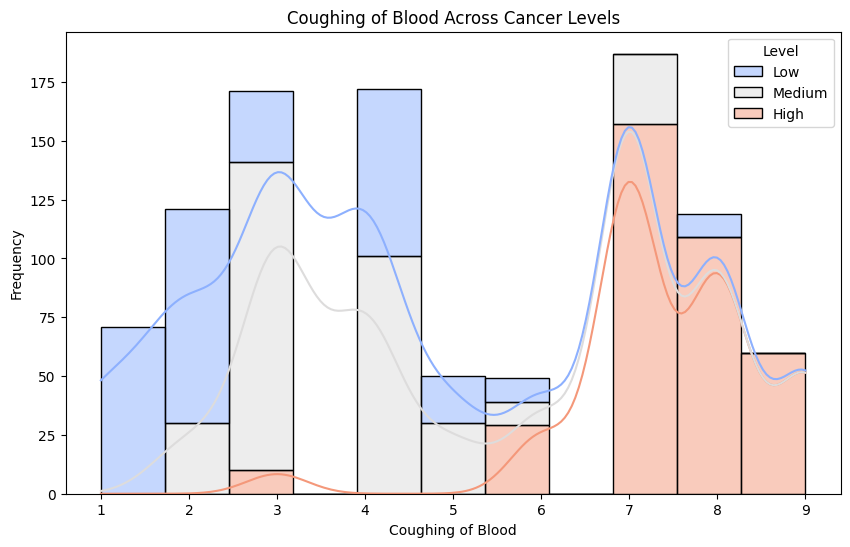

In [ ]:


# 2. Gender Distribution Across Cancer Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette='muted')
plt.title('Gender Distribution of Patients Across Cancer Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# 3. Other feature distributions across Cancer Levels
# Genetic Risk
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Genetic Risk', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Genetic Risk Across Cancer Levels')
plt.xlabel('Genetic Risk')
plt.ylabel('Frequency')
plt.show()

# Obesity
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Obesity', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Obesity Across Cancer Levels')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

# Smoking
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Smoking', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Smoking Habit Across Cancer Levels')
plt.xlabel('Smoking')
plt.ylabel('Frequency')
plt.show()

# Passive Smoker
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Passive Smoker', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Passive Smoker Across Cancer Levels')
plt.xlabel('Passive Smoker')
plt.ylabel('Frequency')
plt.show()

# Balanced Diet
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balanced Diet', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Balanced Diet Across Cancer Levels')
plt.xlabel('Balanced Diet')
plt.ylabel('Frequency')
plt.show()

# Coughing of Blood
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Coughing of Blood', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Coughing of Blood Across Cancer Levels')
plt.xlabel('Coughing of Blood')
plt.ylabel('Frequency')
plt.show()
# Plot for Chronic Lung Disease distribution across cancer levels
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chronic Lung Disease', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Chronic Lung Disease Across Cancer Levels')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Frequency')
plt.show()


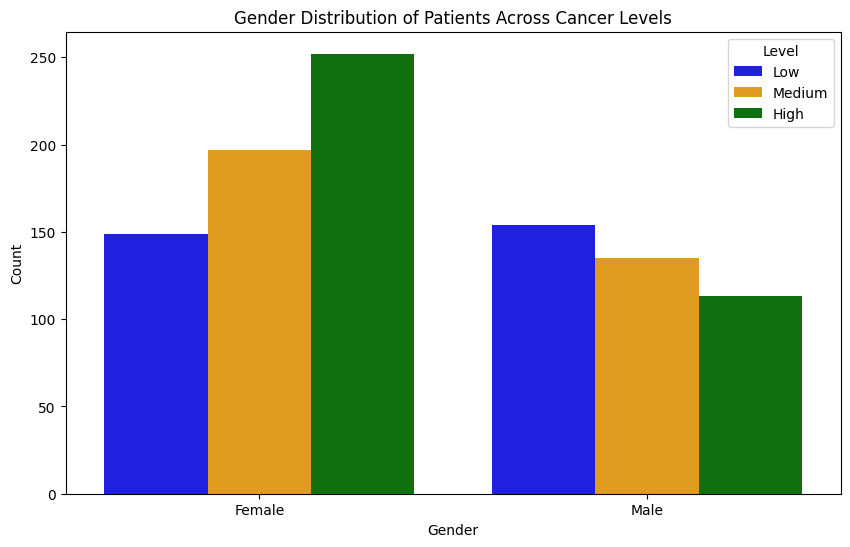

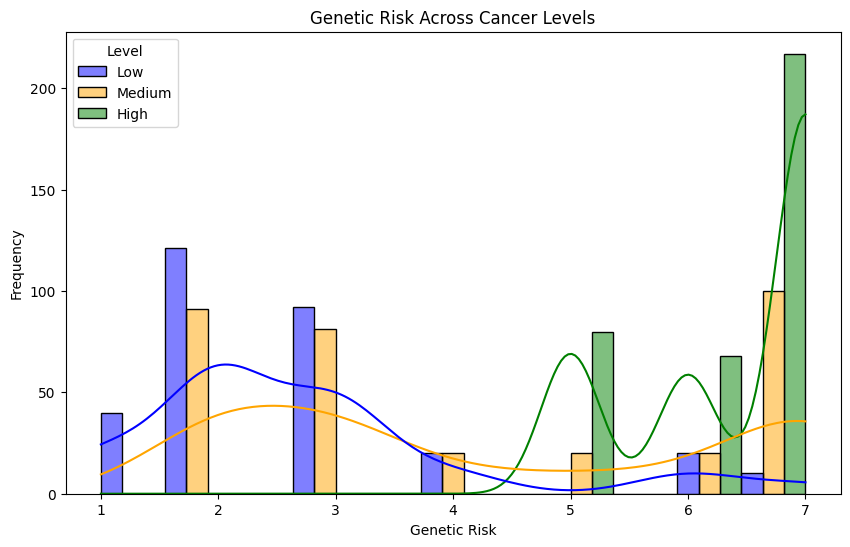

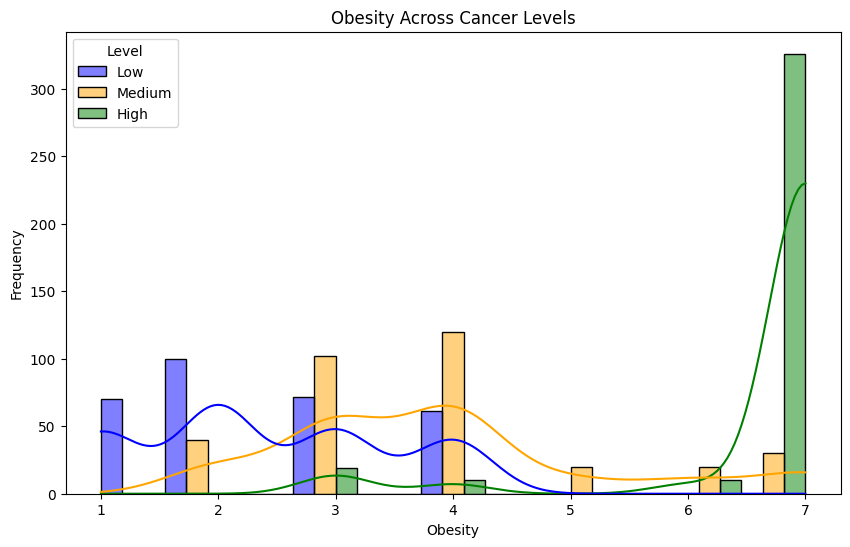

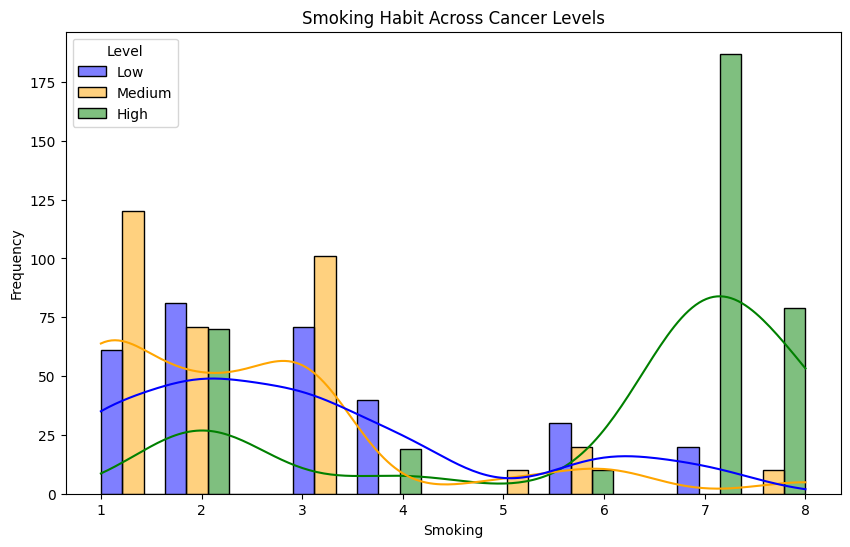

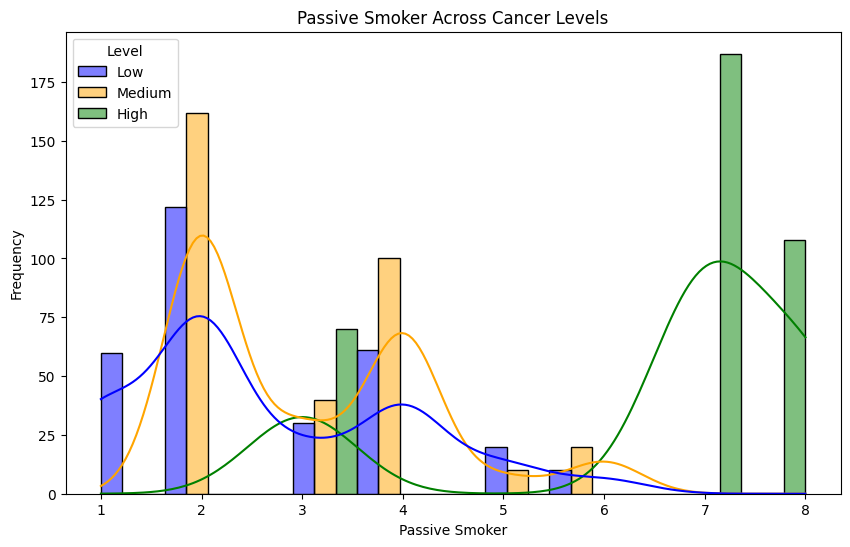

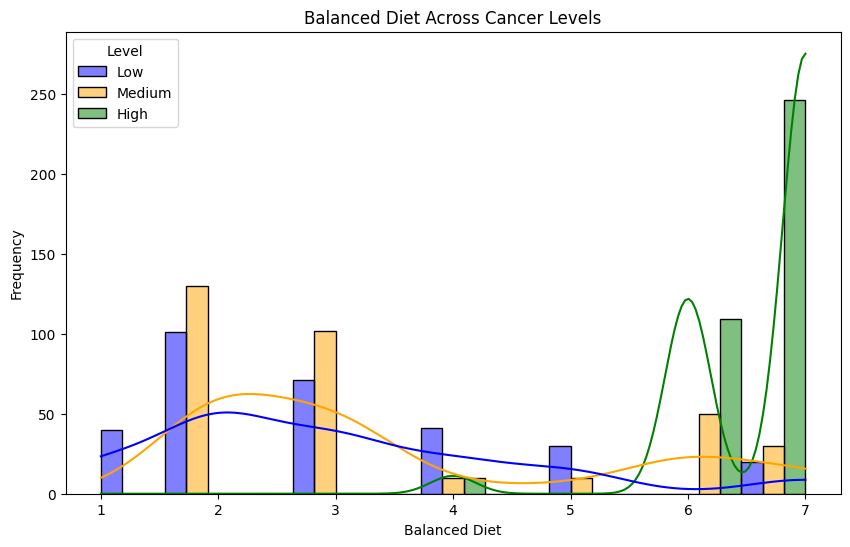

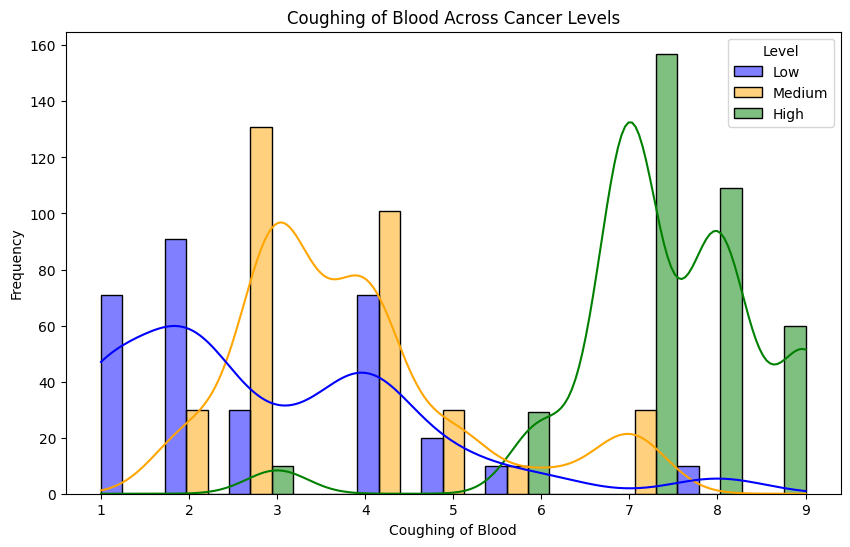

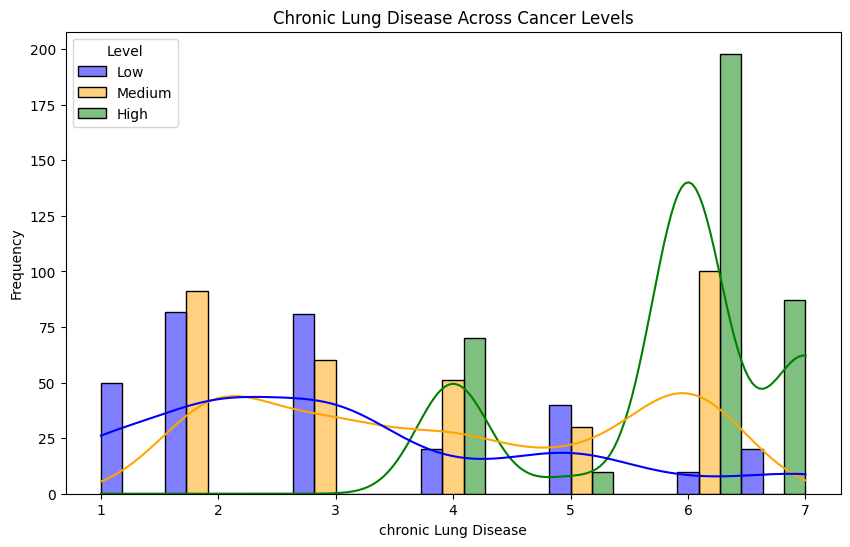

In [ ]:


# Redefine colors for better clarity
colors = ['blue', 'orange', 'green']

# Function to create histplot with bars closer together
def create_histplot(feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Level', kde=True, palette=colors, multiple='dodge')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 2. Gender Distribution Across Cancer Levels with bars closer together
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette=colors, dodge=True)
plt.title('Gender Distribution of Patients Across Cancer Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# 3. Other feature distributions across Cancer Levels with bars closer together
features = [
    ('Genetic Risk', 'Genetic Risk Across Cancer Levels'),
    ('Obesity', 'Obesity Across Cancer Levels'),
    ('Smoking', 'Smoking Habit Across Cancer Levels'),
    ('Passive Smoker', 'Passive Smoker Across Cancer Levels'),
    ('Balanced Diet', 'Balanced Diet Across Cancer Levels'),
    ('Coughing of Blood', 'Coughing of Blood Across Cancer Levels'),
    ('chronic Lung Disease', 'Chronic Lung Disease Across Cancer Levels')
]

for feature, title in features:
    create_histplot(feature, title)


Phân bố giới tính theo các mức độ ung thư:

Biểu đồ cho thấy sự phân bố số lượng bệnh nhân nam và nữ theo các mức độ ung thư (Thấp, Trung bình, Cao). Nhìn chung, số lượng bệnh nhân nam nhiều hơn so với bệnh nhân nữ ở tất cả các mức độ ung thư.
Phân bố nguy cơ di truyền theo các mức độ ung thư:

Biểu đồ phân bố nguy cơ di truyền cho thấy mức độ ung thư càng cao thì số lượng bệnh nhân có nguy cơ di truyền cao hơn. Các bệnh nhân ở mức độ ung thư cao thường có nguy cơ di truyền cao nhất.
Phân bố béo phì theo các mức độ ung thư:

Biểu đồ phân bố béo phì chỉ ra rằng số lượng bệnh nhân có tình trạng béo phì tập trung nhiều ở mức độ ung thư cao.

Biểu đồ thói quen hút thuốc lá cho thấy số lượng bệnh nhân hút thuốc lá tăng lên đáng kể ở các mức độ ung thư cao hơn. Điều này có thể chỉ ra mối liên hệ giữa thói quen hút thuốc lá và nguy cơ ung thư.
Phơi nhiễm hút thuốc lá thụ động theo các mức độ ung thư:

Biểu đồ cho thấy sự phơi nhiễm hút thuốc lá thụ động của bệnh nhân tăng lên theo các mức độ ung thư, đặc biệt ở mức độ ung thư cao.
Chế độ ăn cân đối theo các mức độ ung thư:

Biểu đồ cho thấy bệnh nhân có chế độ ăn cân đối thường có xu hướng tập trung ở mức độ ung thư thấp và trung bình. Ở mức độ ung thư cao, số lượng bệnh nhân có chế độ ăn cân đối giảm.
Ho ra máu theo các mức độ ung thư:

Biểu đồ ho ra máu chỉ ra rằng tình trạng ho ra máu phổ biến hơn ở các bệnh nhân ung thư mức độ cao. Điều này cho thấy triệu chứng ho ra máu có thể là dấu hiệu của ung thư nặng hơn.
Bệnh phổi mãn tính theo các mức độ ung thư:

Biểu đồ bệnh phổi mãn tính cho thấy rằng bệnh nhân có tình trạng bệnh phổi mãn tính cao hơn thường tập trung ở mức độ ung thư cao. Điều này cho thấy mối liên hệ giữa bệnh phổi mãn tính và nguy cơ ung thư cao hơn.

In [ ]:

# Function to calculate the percentage of patients in a specific range for a feature
def calculate_percentage(data, feature, high_risk_data):
    total_patients = len(data)
    high_risk_patients = len(high_risk_data)
    percentage = (high_risk_patients / total_patients) * 100
    return percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Calculating percentages
percentages = {}
for feature in selected_features:
    high_risk_data_filtered = high_risk_data[high_risk_data[feature] >= 5]
    percentages[feature] = calculate_percentage(data, feature, high_risk_data_filtered)

# Creating a dataframe for better visualization
percentages_df = pd.DataFrame(list(percentages.items()), columns=['Feature', 'High Risk Percentage'])
percentages_df = percentages_df.sort_values(by='High Risk Percentage', ascending=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="High Risk Percentages by Feature", dataframe=percentages_df)

percentages_df

NameError: name 'high_risk_data' is not defined

In [ ]:
# Function to calculate the percentage of patients in a specific range for a feature
def calculate_percentage(data, feature, high_risk_data):
    total_patients = len(data)
    high_risk_patients = len(high_risk_data)
    percentage = (high_risk_patients / total_patients) * 100
    return percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Calculating percentages
percentages = {}
for feature in selected_features:
    # Replace high_risk_data with data
    high_risk_data_filtered = data[data[feature] >= 5]
    percentages[feature] = calculate_percentage(data, feature, high_risk_data_filtered)

# Creating a dataframe for better visualization
percentages_df = pd.DataFrame(list(percentages.items()), columns=['Feature', 'High Risk Percentage'])
percentages_df = percentages_df.sort_values(by='High Risk Percentage', ascending=False)


percentages_df

,Feature,High Risk Percentage
2,Dust Allergy,63.6
3,Genetic Risk,53.5
1,Alcohol use,52.5
4,chronic Lung Disease,49.5
6,Balanced Diet,49.5
9,Coughing of Blood,46.5
7,Obesity,40.6
0,Air Pollution,39.5
8,Chest Pain,39.5
5,Smoking,36.6


In [ ]:


# Function to calculate the percentage of patients in each risk category for a feature
def calculate_percentage_by_category(data, feature):
    low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
    medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
    high_risk_percentage = ((data[feature] >= 7).sum() / len(data)) * 100
    return low_risk_percentage, medium_risk_percentage, high_risk_percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Creating an empty DataFrame to store the results
risk_percentage_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])

# Calculating percentages for each risk category for each feature
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data, feature)
    risk_percentage_df.loc[len(risk_percentage_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Sorting the DataFrame by high risk percentage
risk_percentage_df = risk_percentage_df.sort_values(by='High Risk Percentage', ascending=False)
risk_percentage_df



,Feature,Low Risk Percentage,Medium Risk Percentage,High Risk Percentage
2,Dust Allergy,13.0,45.5,41.5
9,Coughing of Blood,19.2,44.2,36.6
7,Obesity,21.0,43.4,35.6
1,Alcohol use,35.4,29.1,35.5
8,Chest Pain,26.1,39.4,34.5
3,Genetic Risk,25.2,42.1,32.7
5,Smoking,40.3,30.1,29.6
6,Balanced Diet,27.1,43.3,29.6
4,chronic Lung Disease,22.3,67.0,10.7
0,Air Pollution,34.2,60.9,4.9


from matplotlib import pyplot as plt
risk_percentage_df['Low Risk Percentage'].plot(kind='hist', bins=20, title='Low Risk Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df['Medium Risk Percentage'].plot(kind='hist', bins=20, title='Medium Risk Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df['High Risk Percentage'].plot(kind='hist', bins=20, title='High Risk Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df.plot(kind='scatter', x='Low Risk Percentage', y='Medium Risk Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df.plot(kind='scatter', x='Medium Risk Percentage', y='High Risk Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df['Low Risk Percentage'].plot(kind='line', figsize=(8, 4), title='Low Risk Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df['Medium Risk Percentage'].plot(kind='line', figsize=(8, 4), title='Medium Risk Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
risk_percentage_df['High Risk Percentage'].plot(kind='line', figsize=(8, 4), title='High Risk Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:


# Splitting the data into male and female
data_male = data[data['Gender'] == 1]
data_female = data[data['Gender'] == 0]

# Function to calculate the percentage of patients in each risk category for a feature
def calculate_percentage_by_category(data, feature):
    low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
    medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
    high_risk_percentage = ((data[feature] >= 7).sum() / len(data)) * 100
    return low_risk_percentage, medium_risk_percentage, high_risk_percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Creating empty DataFrames to store the results for male and female
risk_percentage_male_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])
risk_percentage_female_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])

# Calculating percentages for each risk category for each feature for male
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data_male, feature)
    risk_percentage_male_df.loc[len(risk_percentage_male_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Calculating percentages for each risk category for each feature for female
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data_female, feature)
    risk_percentage_female_df.loc[len(risk_percentage_female_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Sorting the DataFrames by high risk percentage
risk_percentage_male_df = risk_percentage_male_df.sort_values(by='High Risk Percentage', ascending=False)
risk_percentage_female_df = risk_percentage_female_df.sort_values(by='High Risk Percentage', ascending=False)

risk_percentage_male_df, risk_percentage_female_df


<ipython-input-23-78cc4f47252e>:7: RuntimeWarning: invalid value encountered in scalar divide
  low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
<ipython-input-23-78cc4f47252e>:8: RuntimeWarning: invalid value encountered in scalar divide
  medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
<ipython-input-23-78cc4f47252e>:9: RuntimeWarning: invalid value encountered in scalar divide
  high_risk_percentage = ((data[feature] >= 7).sum() / len(data)) * 100
<ipython-input-23-78cc4f47252e>:7: RuntimeWarning: invalid value encountered in scalar divide
  low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
<ipython-input-23-78cc4f47252e>:8: RuntimeWarning: invalid value encountered in scalar divide
  medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
<ipython-input-23-78cc4f47252e>:9: RuntimeWarning: invalid value encountered in scalar divide
  high_risk_percentage = ((d

(                Feature  Low Risk Percentage  Medium Risk Percentage  \
 2          Dust Allergy            11.538462               40.133779   
 1           Alcohol use            24.414716               30.434783   
 9     Coughing of Blood            10.033445               49.498328   
 8            Chest Pain            19.732441               39.966555   
 7               Obesity            19.565217               41.638796   
 3          Genetic Risk            17.056856               44.314381   
 5               Smoking            34.113712               27.759197   
 6         Balanced Diet            26.755853               38.127090   
 4  chronic Lung Disease            21.404682               62.207358   
 0         Air Pollution            28.428094               67.892977   
 
    High Risk Percentage  
 2             48.327759  
 1             45.150502  
 9             40.468227  
 8             40.301003  
 7             38.795987  
 3             38.628763  
 5    

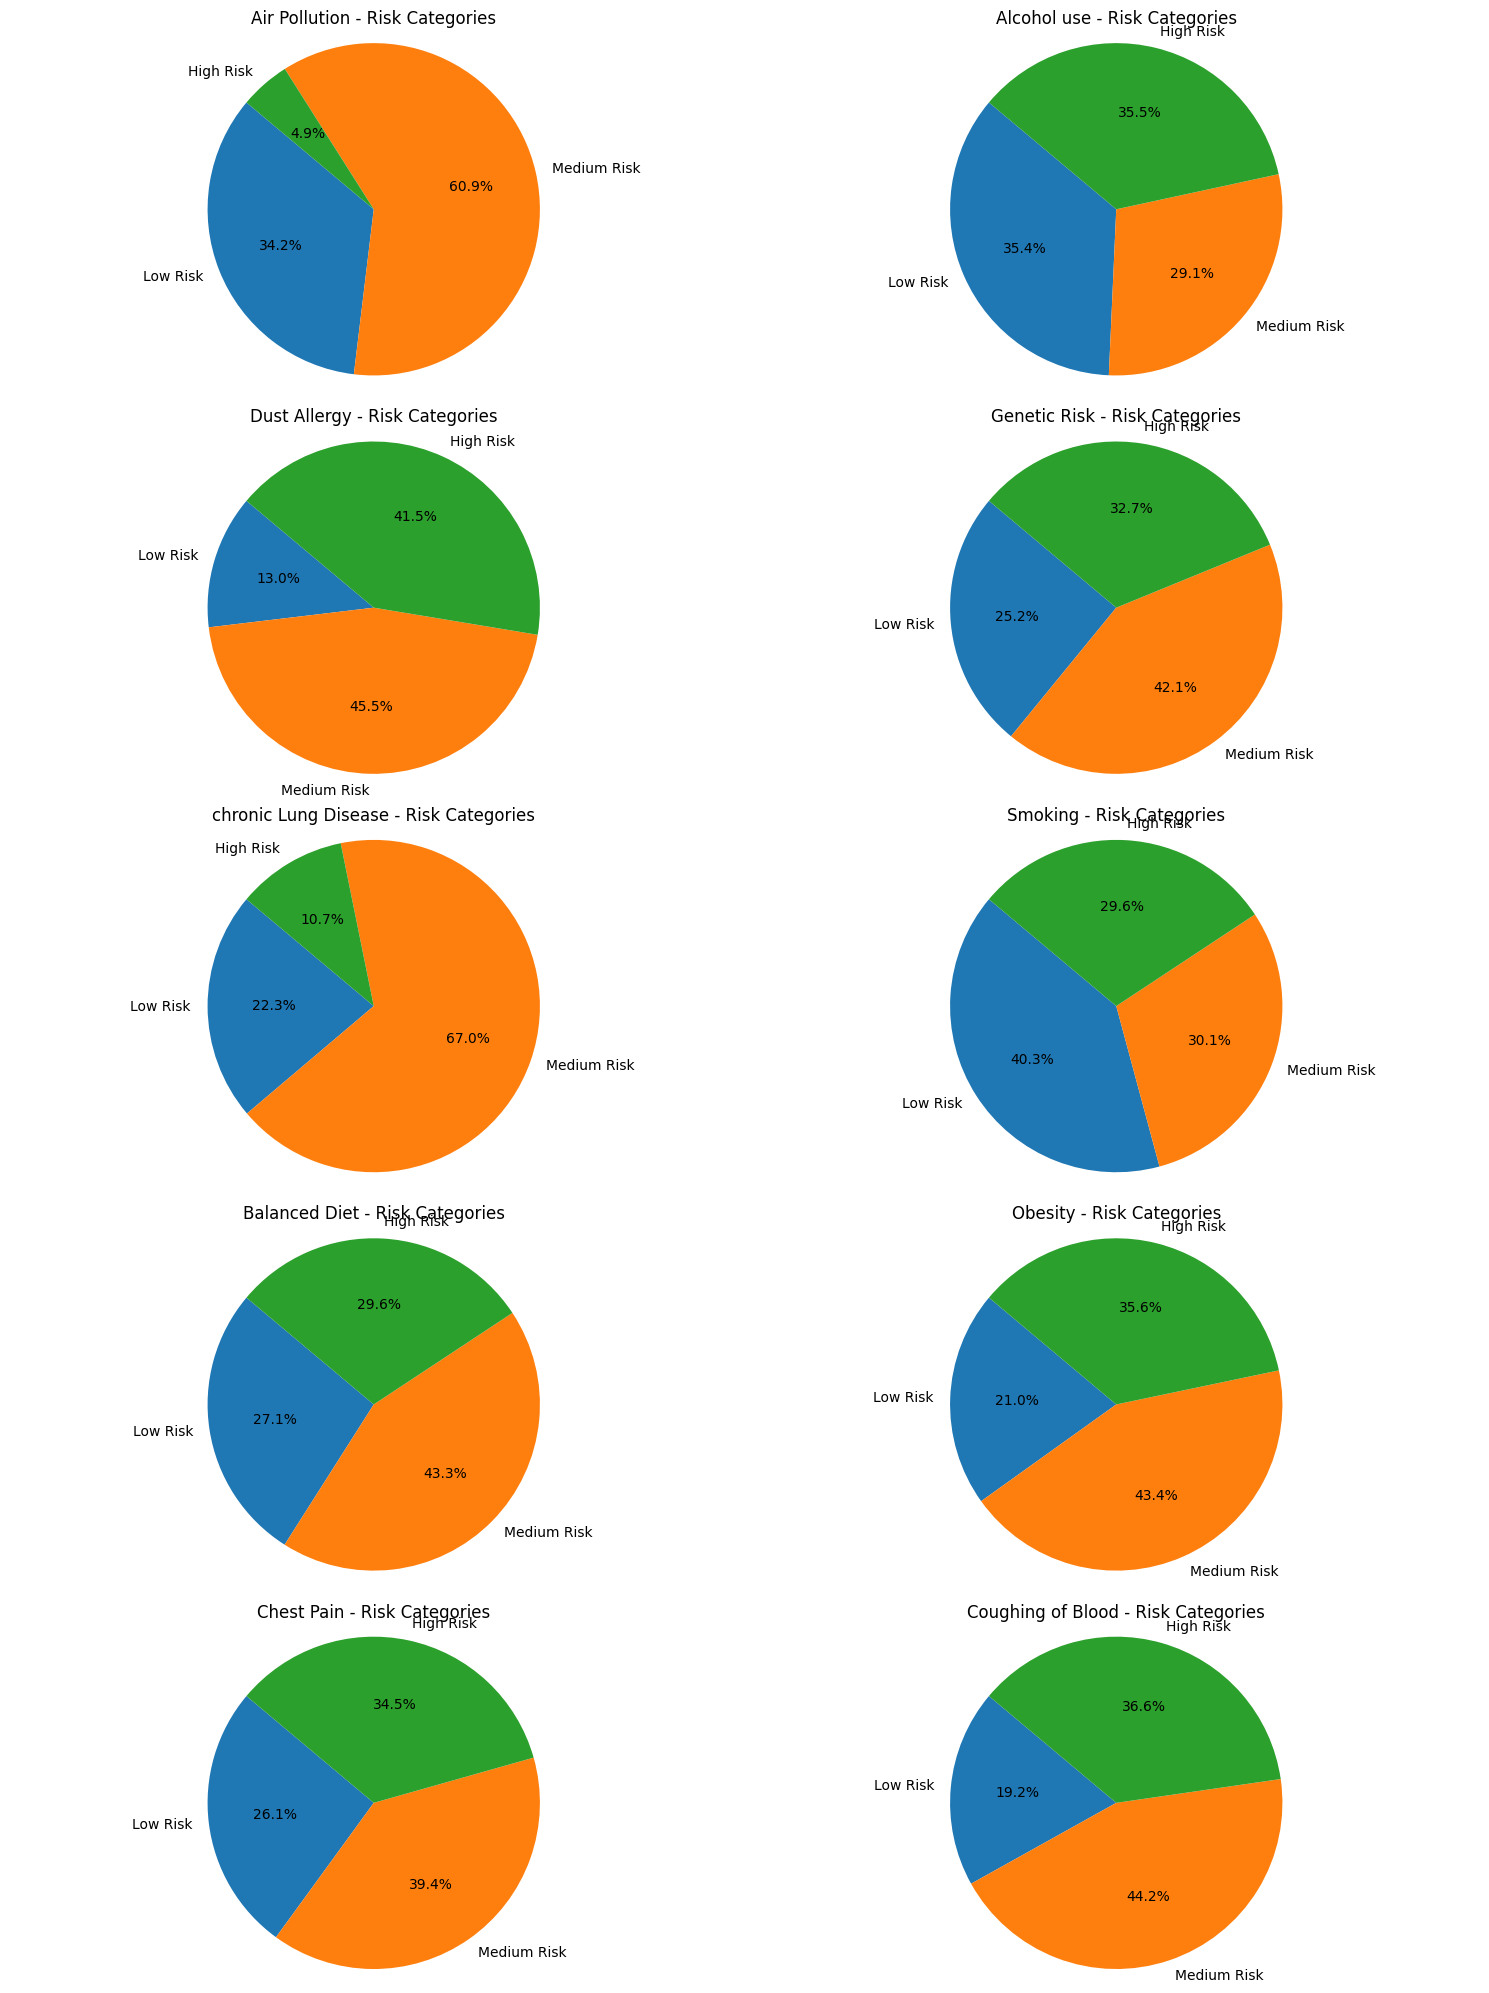

In [ ]:
import matplotlib.pyplot as plt


# Plot pie charts for each feature
plt.figure(figsize=(15, 20))
num_features = len(risk_percentage_df)
for i, row in risk_percentage_df.iterrows():
    plt.subplot((num_features // 2) + (num_features % 2), 2, i + 1)
    percentages = row[['Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage']].values
    labels = ['Low Risk', 'Medium Risk', 'High Risk']
    plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{row["Feature"]} - Risk Categories')
    plt.axis('equal')

plt.tight_layout()
plt.show()


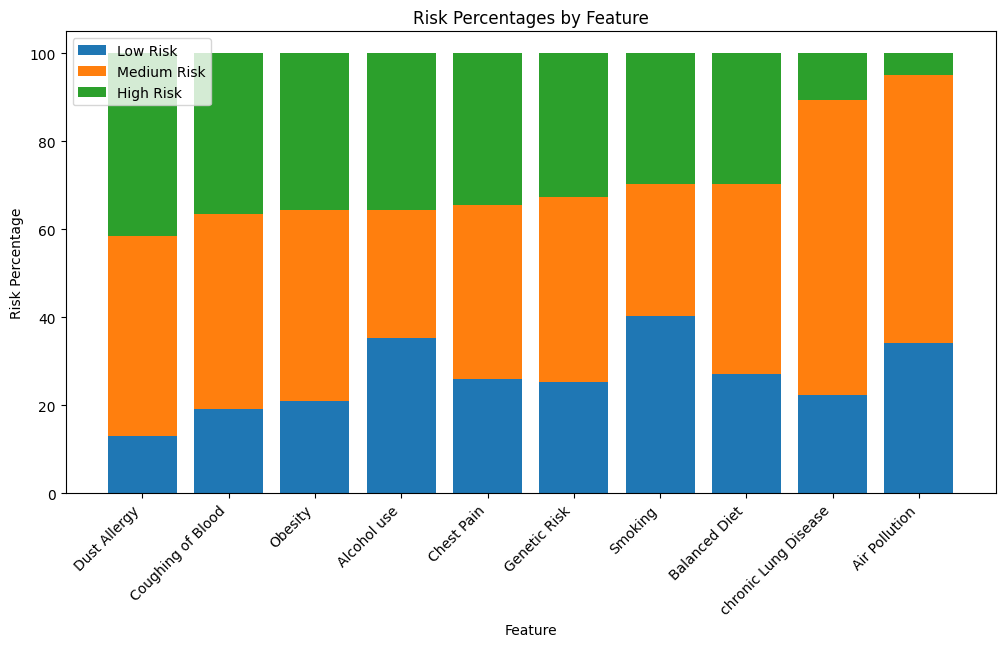

In [ ]:
# @title Risk Percentages by Feature

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'risk_percentage_df'
plt.figure(figsize=(12, 6))
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['Low Risk Percentage'], label='Low Risk')
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['Medium Risk Percentage'], bottom=risk_percentage_df['Low Risk Percentage'], label='Medium Risk')
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['High Risk Percentage'], bottom=risk_percentage_df['Low Risk Percentage'] + risk_percentage_df['Medium Risk Percentage'], label='High Risk')
plt.xlabel('Feature')
plt.ylabel('Risk Percentage')
plt.title('Risk Percentages by Feature')
plt.xticks(rotation=45, ha='right')
_ = plt.legend()


# Model building

<ipython-input-29-86c66e62cb94>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h', ax=ax)


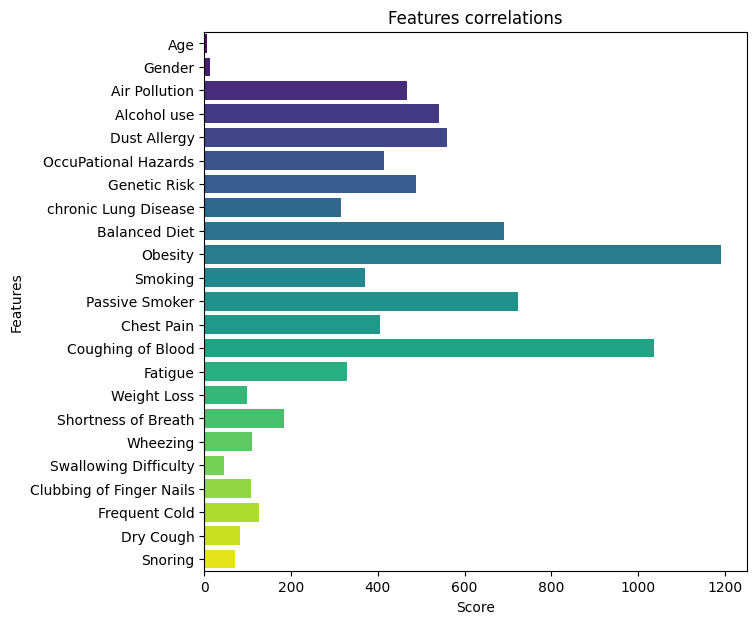

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target variable
# Tách các tính năng và biến mục tiêu
X = data.drop(['Level'], axis=1)
y = data['Level']

# SelectKBest to select features
# Chọn các tính năng với SelectKBest
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)

# Create DataFrame for visualization
# Tạo DataFrame để trực quan hóa
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Plotting feature scores
# Vẽ biểu đồ điểm số các biến
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h', ax=ax)
plt.title('Features correlations')
plt.xlabel('Score')
plt.ylabel('Features')
plt.savefig('Feature_Importance.png')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Chọn các tính năng với điểm số >= 200
selected_features = featureScores[featureScores['Score'] >= 200]['Feature'].tolist()
selected_features.append('Level')  # Thêm biến mục tiêu
new_data = data[selected_features]

# Tách các tính năng và biến mục tiêu
X = new_data.drop(['Level'], axis=1)
y = new_data['Level']

# Mã hóa biến mục tiêu
le = LabelEncoder()
y = le.fit_transform(y)

# Chuẩn hóa các tính năng
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Khởi tạo các mô hình
log_reg = LogisticRegression(random_state=42, max_iter=200, C=0.1)
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(random_state=42, max_iter=300, alpha=0.1)

# Đánh giá mô hình bằng cách chéo
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
dec_tree_scores = cross_val_score(dec_tree, X, y, cv=5)
rand_forest_scores = cross_val_score(rand_forest, X, y, cv=5)
knn_scores = cross_val_score(knn, X, y, cv=5)
mlp_scores = cross_val_score(mlp, X, y, cv=5)

# Huấn luyện các mô hình
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
mlp.fit(X_train, y_train)


MLPClassifier(alpha=0.1, max_iter=300, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# Dự đoán trên tập kiểm tra
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)
knn_pred = knn.predict(X_test)
mlp_pred = mlp.predict(X_test)

# Báo cáo phân loại
log_reg_report = classification_report(y_test, log_reg_pred, target_names=le.classes_)
dec_tree_report = classification_report(y_test, dec_tree_pred, target_names=le.classes_)
rand_forest_report = classification_report(y_test, rand_forest_pred, target_names=le.classes_)
knn_report = classification_report(y_test, knn_pred, target_names=le.classes_)
mlp_report = classification_report(y_test, mlp_pred, target_names=le.classes_)

# Hiển thị điểm đánh giá chéo

cross_val_results = {
    "Logistic Regression": log_reg_scores,
    "Decision Tree": dec_tree_scores,
    "Random Forest": rand_forest_scores,
    "KNN": knn_scores,
    "MLP Classifier": mlp_scores
}

cross_val_df = pd.DataFrame(cross_val_results)

print("Cross Validation Scores:\n", cross_val_df)
print("\nLogistic Regression Report:\n", log_reg_report)
print("\nDecision Tree Report:\n", dec_tree_report)
print("\nRandom Forest Report:\n", rand_forest_report)
print("\nKNN Report:\n", knn_report)
print("\nMLP Classifier Report:\n", mlp_report)


Cross Validation Scores:
    Logistic Regression  Decision Tree  Random Forest  KNN  MLP Classifier
0                0.870          0.990            1.0  1.0             1.0
1                0.830          0.990            1.0  1.0             1.0
2                0.885          0.990            1.0  1.0             1.0
3                0.885          0.990            1.0  1.0             1.0
4                0.875          0.965            1.0  1.0             1.0

Logistic Regression Report:
               precision    recall  f1-score   support

        High       0.96      1.00      0.98        82
         Low       0.82      0.84      0.83        55
      Medium       0.85      0.79      0.82        63

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200


Decision Tree Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1

Dữ liệu đã được xử lý, chọn lựa tính năng, huấn luyện mô hình và đánh giá thành công. Dưới đây là các kết quả chính:

**Điểm Đánh Giá Chéo**
Điểm đánh giá chéo cho mỗi mô hình được hiển thị trong bảng. Hầu hết các mô hình đạt điểm cao, cho thấy hiệu suất tốt trong quá trình đánh giá chéo.

Báo Cáo Phân Loại Logistic Regression  
Báo Cáo Hồi Quy Tuyến Tính: **bold text**

Độ chính xác tổng thể: 89%
Precision, recall và f1-score cho mỗi lớp đều tốt, đặc biệt là lớp "High".
B**áo Cáo Cây Quyết Định Decision Tree** :

Độ chính xác tổng thể: 99%
Precision, recall và f1-score rất cao cho tất cả các lớp.
Báo Cáo Random Forest  :

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Báo Cáo KNN:

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Báo Cáo Bộ Phân Loại MLP:

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Các mô hình Random Forest, KNN và MLP đều hoạt động xuất sắc với điểm số hoàn hảo, cho thấy khả năng overfitting tiềm ẩn. Mô hình Decision Tree cũng hoạt động rất tốt nhưng với điểm số hơi thấp hơn so với Random Forest, KNN và MLP.

In [ ]:
import random

# Generate a random number
number = random.randint(-10, 10)  # Generates a random integer between -10 and 10

if number > 0:
    print('Number is positive.')
elif number == 0:
    print('Number is zero.')
else:
    print('Number is negative.')


TypeError: 'module' object is not callable